In [13]:
import pandas as pd
df = pd.read_csv("E:/startup_financials.csv")
print("Preview of Data:")
print(df.head())
print("\n Dataset Info:")
print(df.info())

Preview of Data:
      Month  Revenue  Operating Cost  Marketing  Cash Flow  Profit
0  Jan-2023   120000           40000      10000      20000   70000
1  Feb-2023   130000           45000      12000      25000   73000
2  Mar-2023   125000           42000      11000      23000   72000
3  Apr-2023   140000           48000      13000      27000   79000
4  May-2023   150000           49000      12500      28000   88500

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Month           12 non-null     object
 1   Revenue         12 non-null     int64 
 2   Operating Cost  12 non-null     int64 
 3   Marketing       12 non-null     int64 
 4   Cash Flow       12 non-null     int64 
 5   Profit          12 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 708.0+ bytes
None


In [45]:
#Kpi Calculations 

#gross margin 

df["Gross Margin%"] = (df["Profit"] / df["Revenue"]) * 100


# Burn rate
df["Burn Rate"] = (df["Operating Cost"] + df["Marketing"] )/ df["Revenue"]


# Net savings


df["Net Savings%"] = (df["Cash Flow"] / df["Revenue"]) * 100


print("Financial KPIs Preview:")
print(df[["Month", "Revenue", "Profit", "Gross Margin%", "Burn Rate", "Net Savings%"]].head(14))



Financial KPIs Preview:
       Month  Revenue  Profit  Gross Margin%  Burn Rate  Net Savings%
0   Jan-2023   120000   70000      58.333333   0.416667     16.666667
1   Feb-2023   130000   73000      56.153846   0.438462     19.230769
2   Mar-2023   125000   72000      57.600000   0.424000     18.400000
3   Apr-2023   140000   79000      56.428571   0.435714     19.285714
4   May-2023   150000   88500      59.000000   0.410000     18.666667
5   Jun-2023   155000   91000      58.709677   0.412903     19.354839
6   Jul-2023   160000   94500      59.062500   0.409375     20.000000
7   Aug-2023   165000   99500      60.303030   0.396970     18.787879
8   Sep-2023   158000   92500      58.544304   0.414557     18.670886
9   Oct-2023   162000   93000      57.407407   0.425926     19.135802
10  Nov-2023   170000   99500      58.529412   0.414706     19.117647
11  Dec-2023   175000  102500      58.571429   0.414286     19.428571


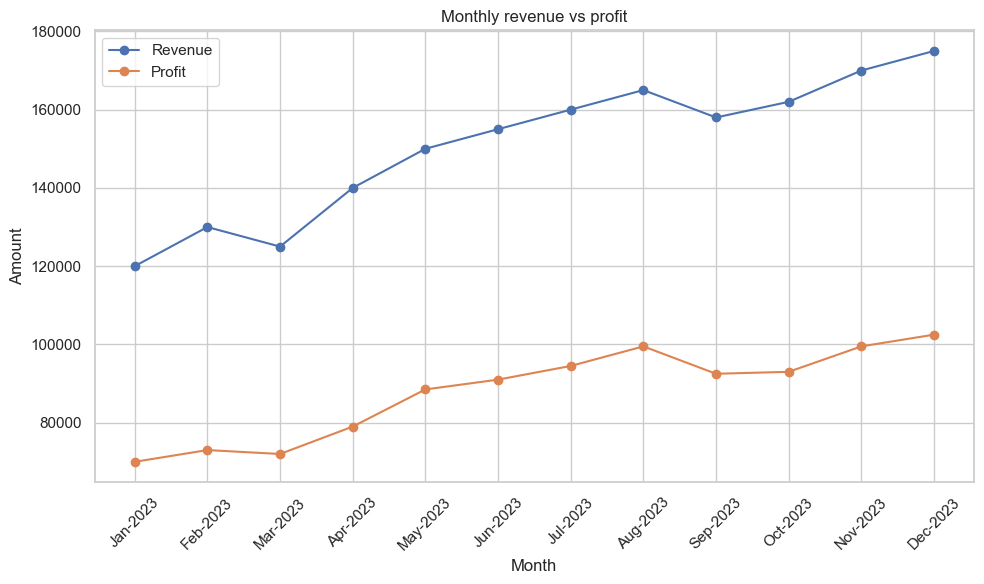

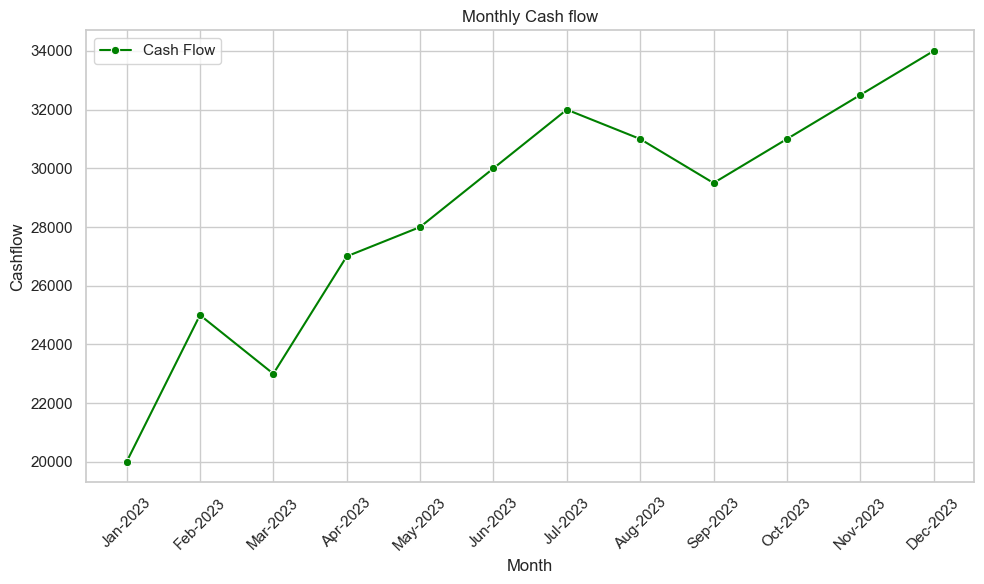

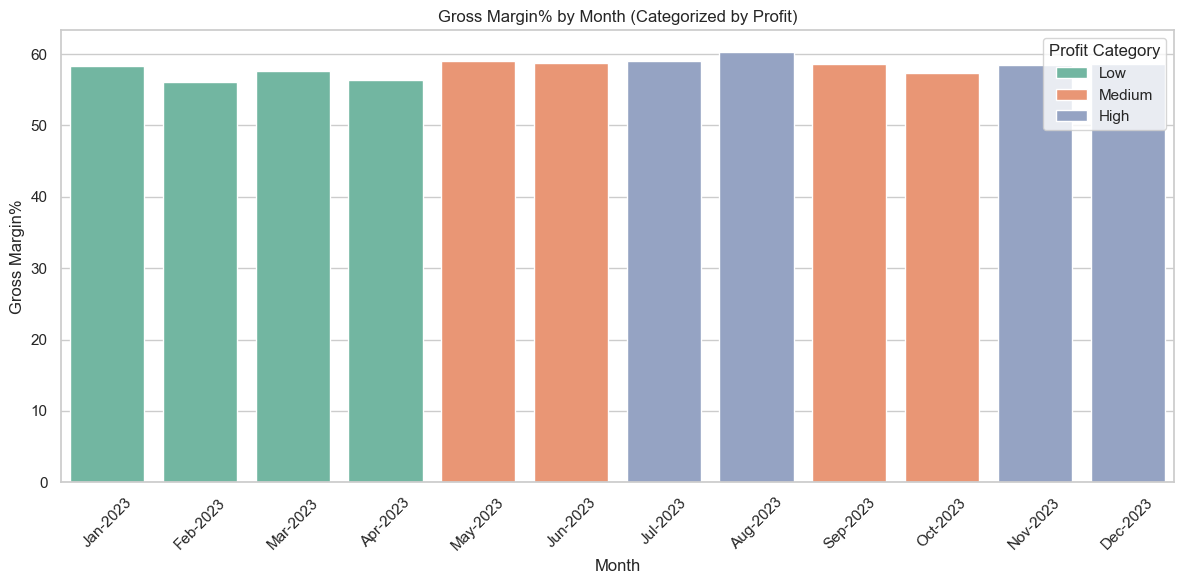

In [56]:
# abb karenge plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style = 'whitegrid')

df['Month'] = pd.Categorical(df['Month'], categories = df['Month'], ordered = True)

#linechart revenue vs profit

plt.figure(figsize = (10,6))
plt.plot(df['Month'], df['Revenue'], marker = 'o', label = 'Revenue')
plt.plot(df['Month'], df['Profit'], marker = 'o', label = 'Profit')
plt.title('Monthly revenue vs profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


#line chart cashflow

plt.figure(figsize = (10,6))
sns.lineplot(data = df, x = 'Month' , y = 'Cash Flow', marker = 'o', label = 'Cash Flow', color = 'green')
plt.title('Monthly Cash flow')
plt.xlabel('Month')
plt.ylabel('Cashflow')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


#Gross Margin % trend bar plot
df['Profit Category'] = pd.qcut(df['Profit'], q=3, labels=["Low", "Medium", "High"])

# 📊 STEP 3.6: Gross Margin % bar plot with hue = Profit Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Gross Margin%', hue='Profit Category', palette='Set2')

plt.title('Gross Margin% by Month (Categorized by Profit)')
plt.xlabel('Month')
plt.ylabel('Gross Margin%')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Profit Category')
plt.show()

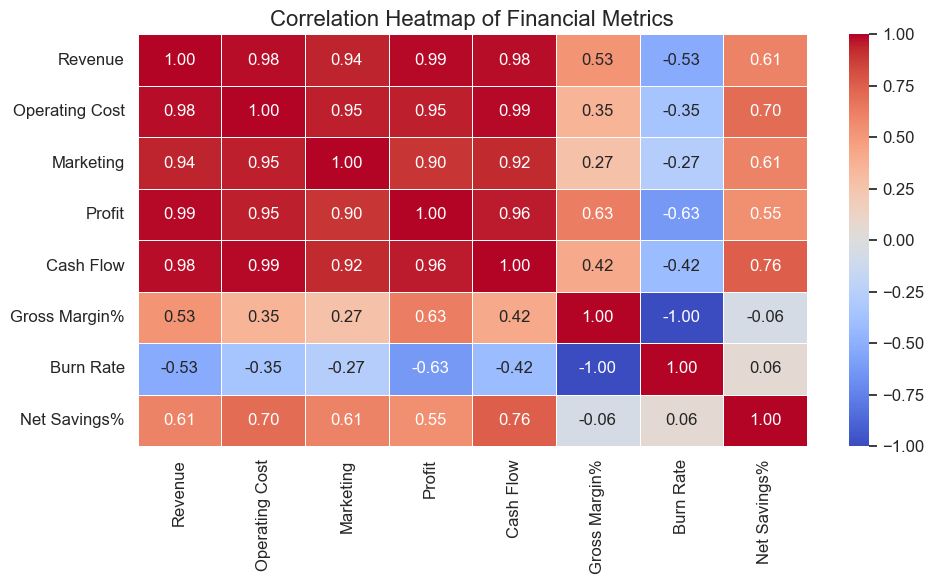

In [60]:
# 🧠 STEP 4.1: Select numeric columns
num_cols = ['Revenue', 'Operating Cost', 'Marketing', 'Profit', 
            'Cash Flow', 'Gross Margin%', 'Burn Rate', 'Net Savings%']
corr_matrix = df[num_cols].corr()

# 🎨 STEP 4.2: Set global font settings for readability
plt.rcParams.update({
    'font.size': 12,                  # Base font size
    'axes.titlesize': 16,             # Title font size
    'axes.labelsize': 14,             # Axis label font size
    'xtick.labelsize': 12,            # Tick label size
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'font.family': 'Arial'            # You can change to Calibri, Times New Roman, etc.
})

# 🔥 STEP 4.3: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Financial Metrics')
plt.tight_layout()
plt.show()
